### Data analysis and logistic regression modeling of the "Titanic test_data"

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
test_data= pd.read_csv('Titanic_test.csv')

In [11]:
test_data['Survived'] = test_data['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [12]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [13]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [14]:
# Display data types and summary statistics
print(test_data.info())
print(test_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN         NaN               418     2         NaN   
top             NaN       

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

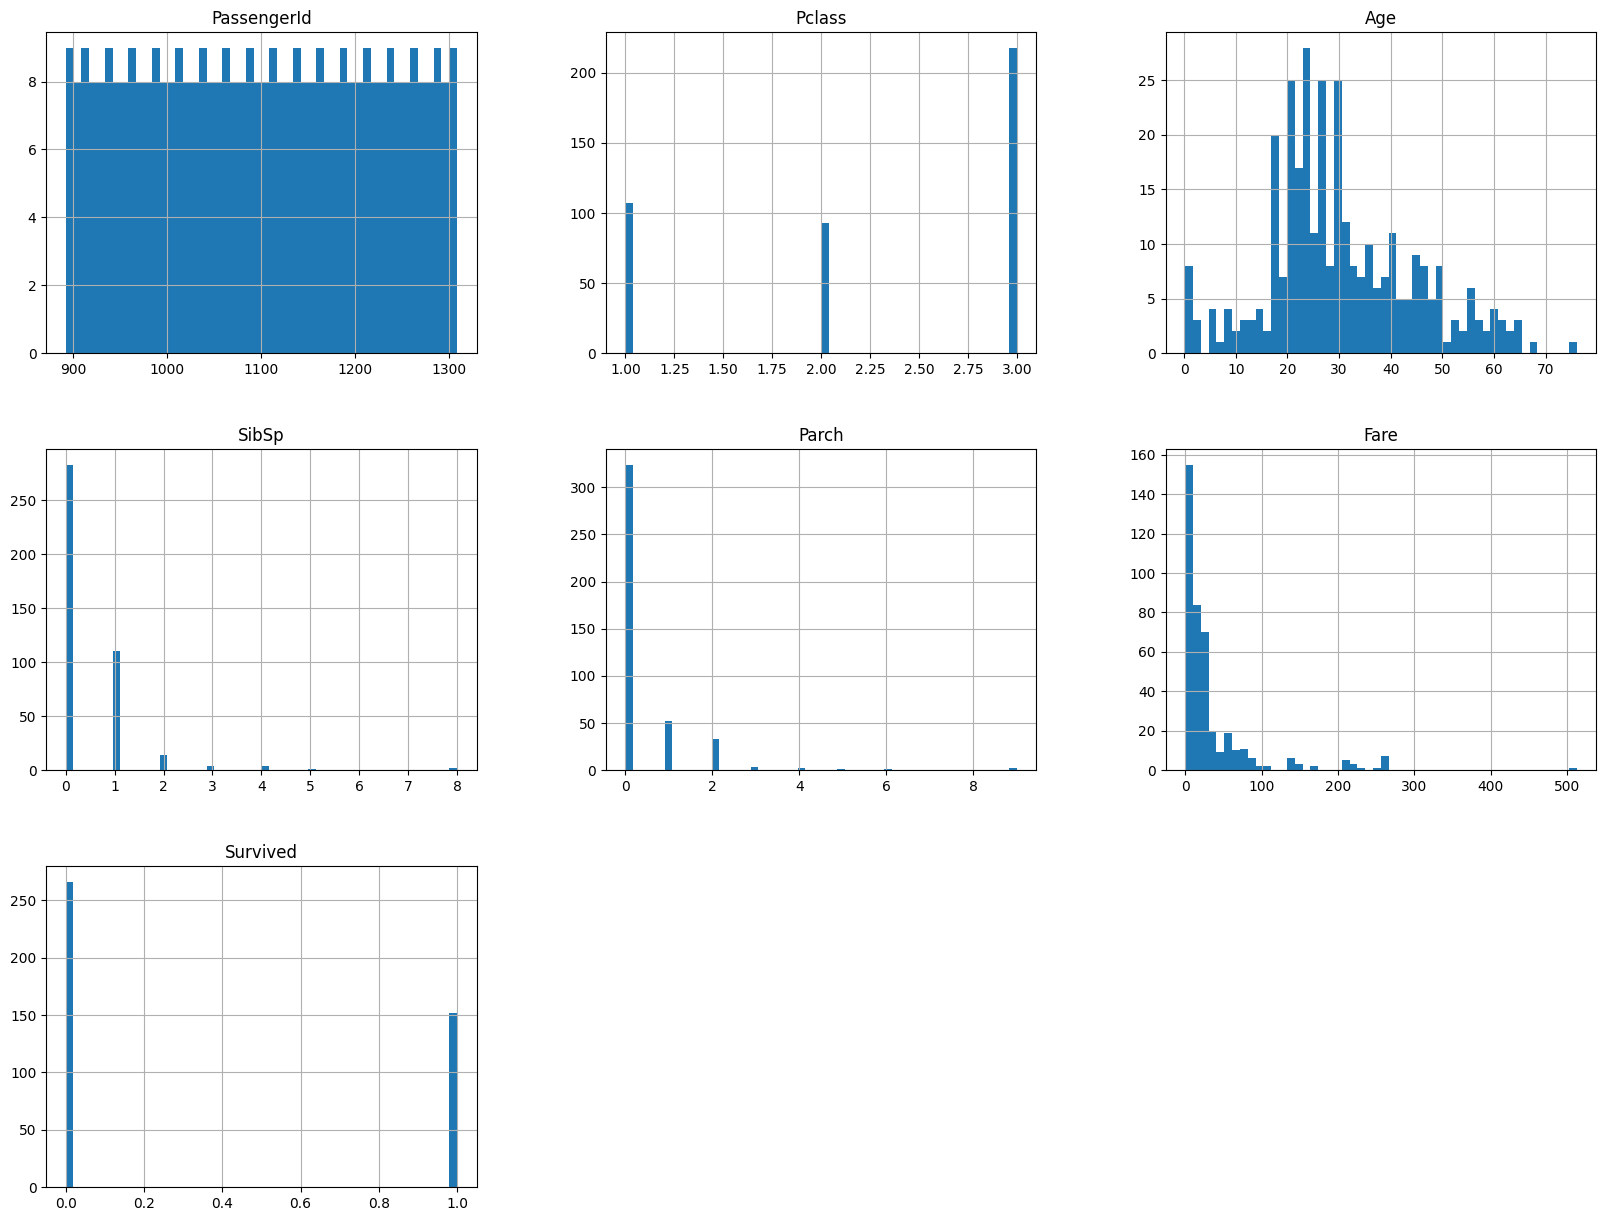

In [16]:
# Histograms for numerical features
test_data.hist(bins=50, figsize=(20,15))
plt.show()

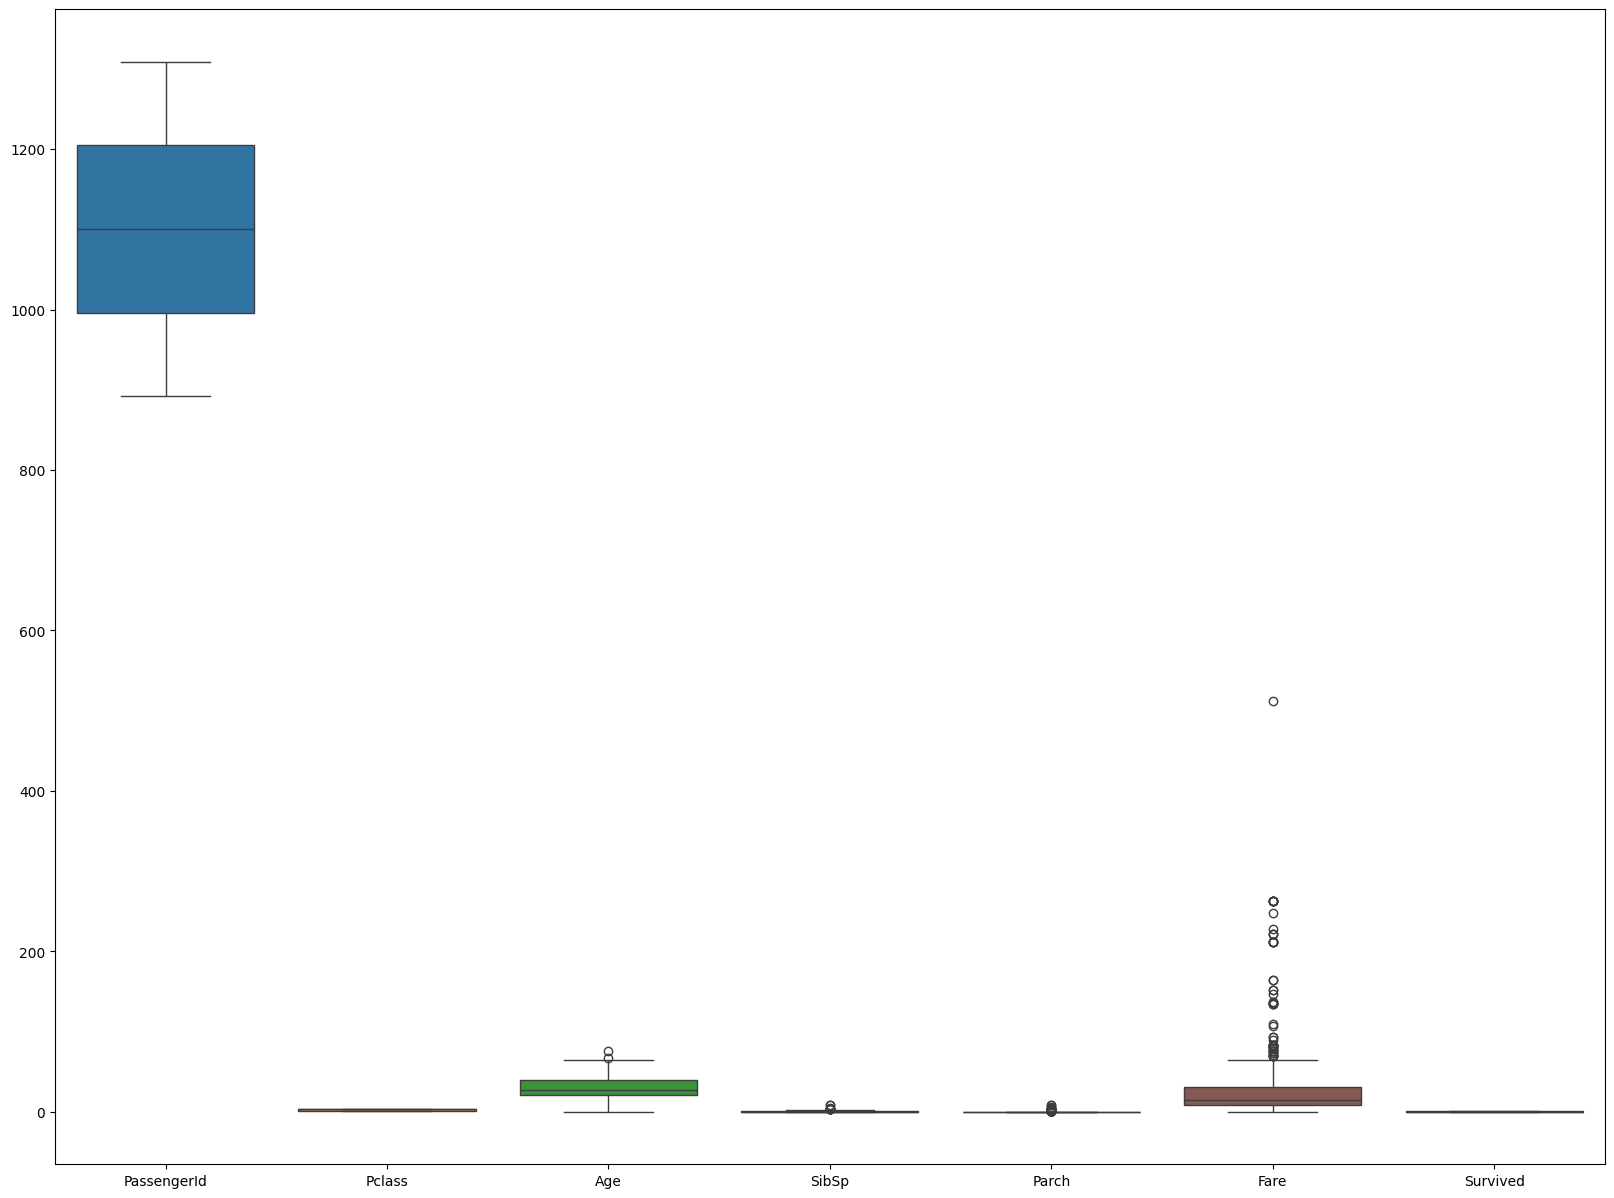

In [18]:
# Box plots for numerical features
plt.figure(figsize=(20,15))
sns.boxplot(data=test_data.select_dtypes(include=['float64', 'int64']))
plt.show()

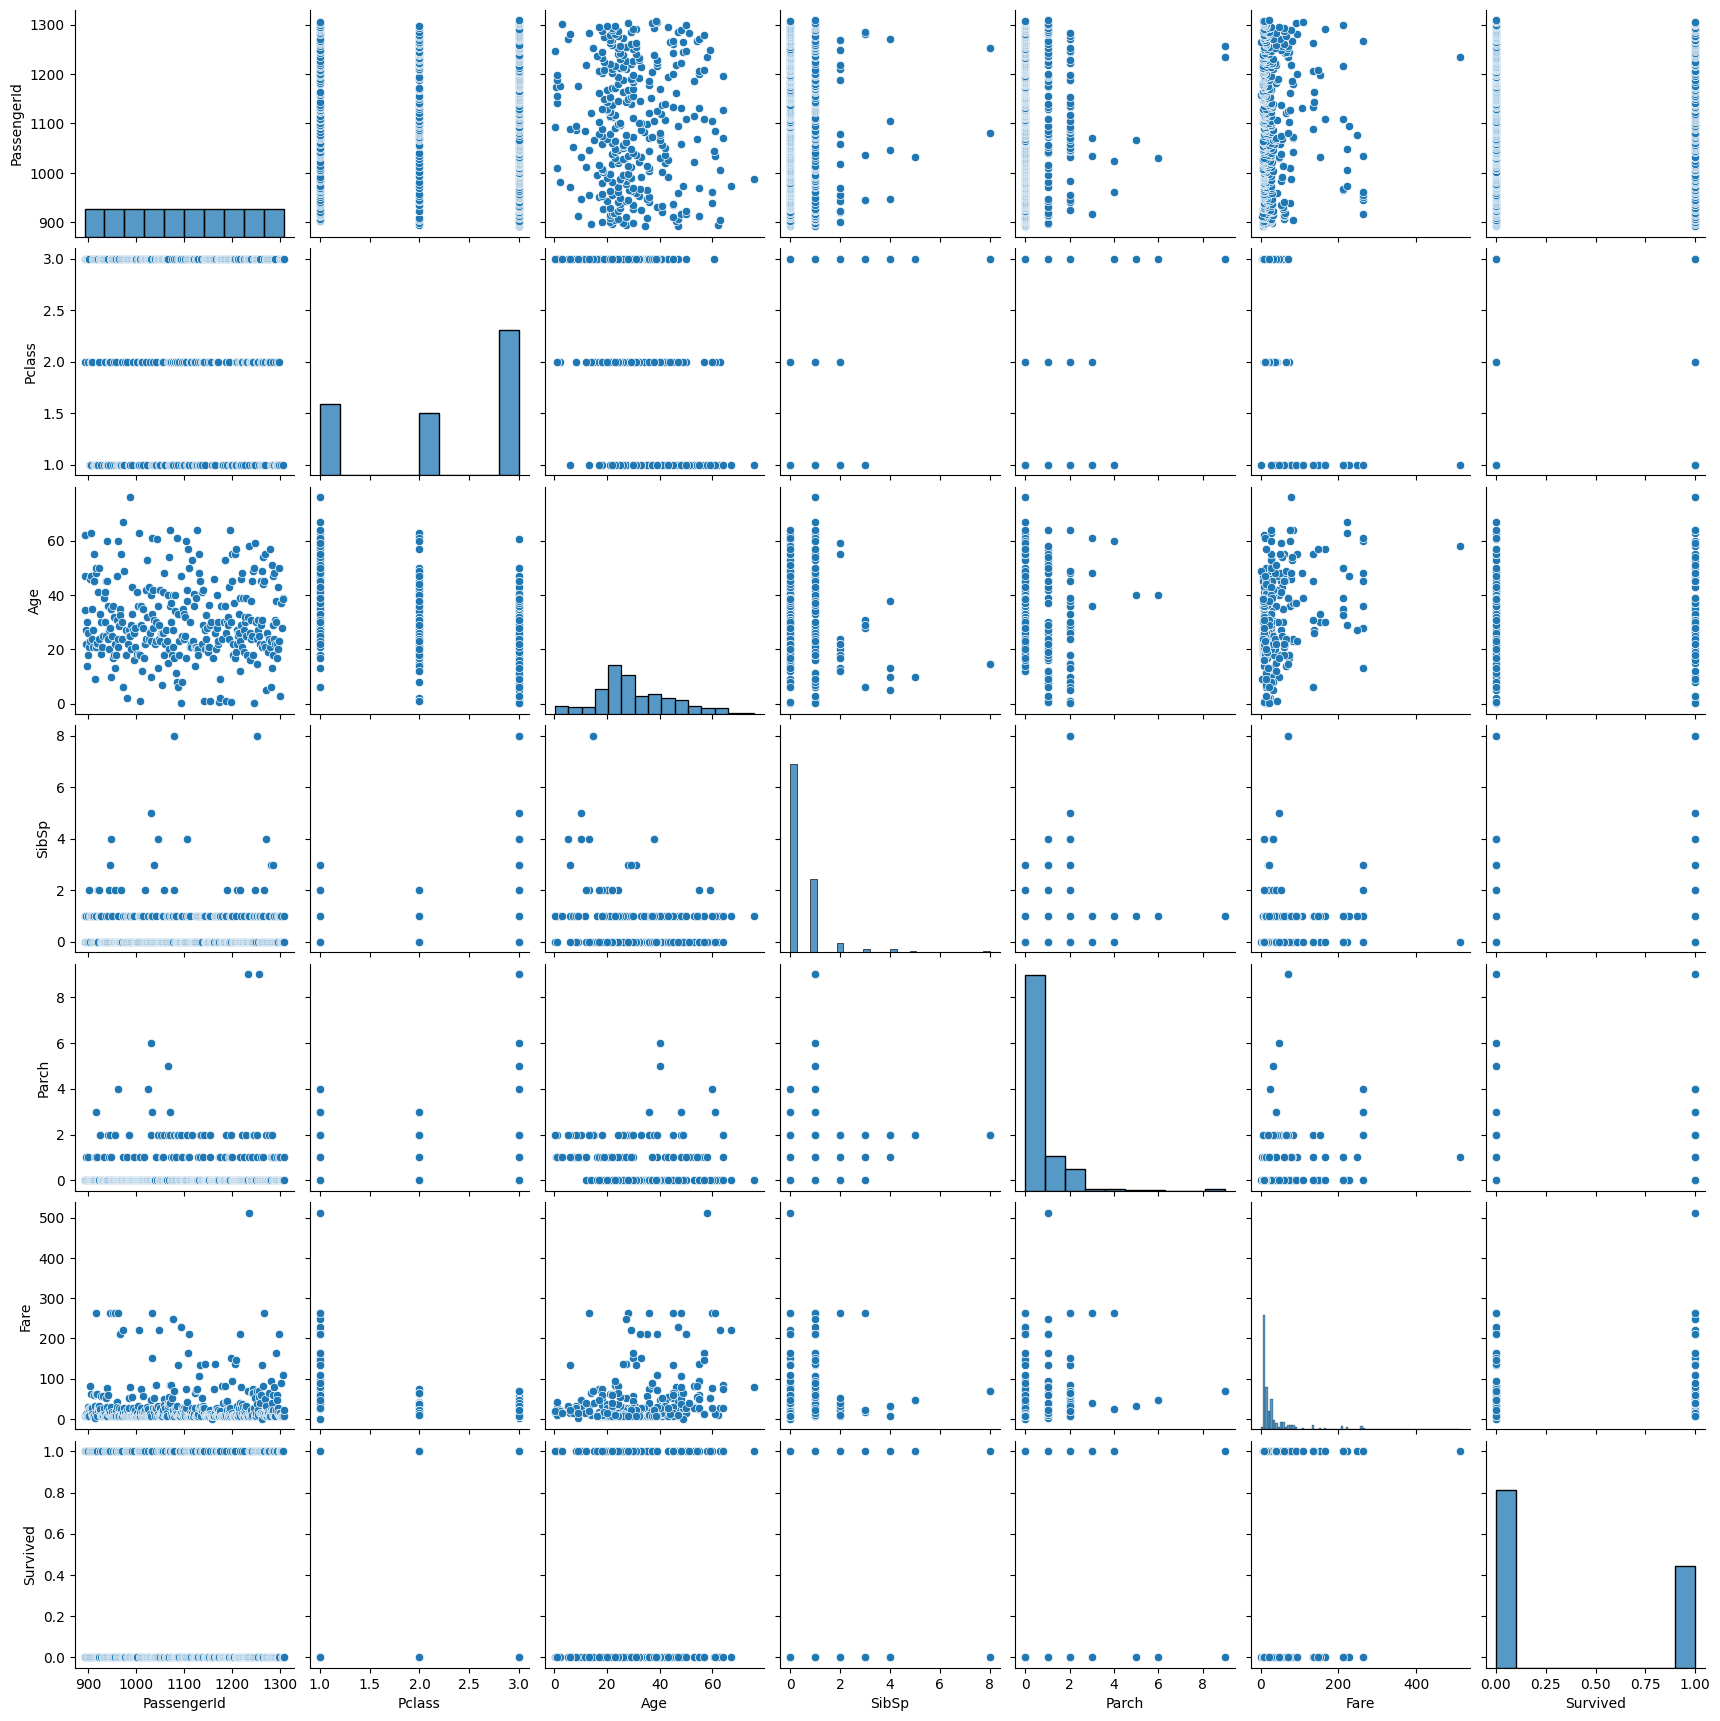

In [19]:
# Pair plots to visualize relationships
sns.pairplot(test_data)
plt.show()

In [20]:
# Check for missing values
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [23]:
# Assuming test_data is your DataFrame

# Fill missing values in the 'Age' column with the median age
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Fill missing values in the 'Fare' column with the median fare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Check if 'Cabin' column exists before trying to drop it
if 'Cabin' in test_data.columns:
    test_data.drop(columns=['Cabin'], inplace=True)
else:
    print("'Cabin' column not found in the DataFrame")

# Display the count of missing values in each column
print(test_data.isnull().sum())

'Cabin' column not found in the DataFrame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64


In [24]:
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
# Define features and target variable
X = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = test_data['Survived']

In [27]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [30]:
# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

In [31]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

In [32]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


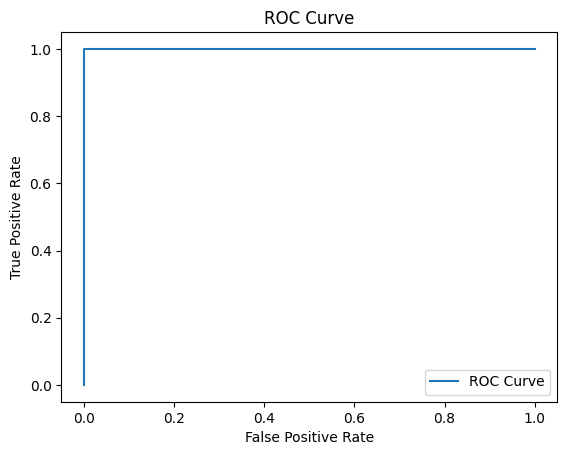

In [33]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
# Coefficients of the logistic regression model
coef = pd.Series(model.coef_[0], index=X.columns)
print(coef)

Pclass       -0.108633
Age          -0.002109
SibSp         0.067868
Parch         0.087292
Fare          0.002684
Sex_male     -6.287001
Embarked_Q    0.337114
Embarked_S   -0.100228
dtype: float64


#### Model Training and Evaluation
Data Split: Training and validation using 80:20 ratio.
Model: Logistic Regression with a maximum of 200 iterations.
Performance Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0

#### Logistic Regression Coefficients
Coefficients for Features:
Pclass: -0.108633
Age: -0.002109
SibSp: 0.067868
Parch: 0.087292
Fare: 0.002684
Sex_male: -6.287001
Embarked_Q: 0.337114
Embarked_S: -0.100228